# Multivariate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("game_data_final.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,c2'a1Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


In [3]:
top3_publishers = data["Publisher"].value_counts().index[:3]
top3_platforms = data["Platform"].value_counts().index[:3]
top3_genres = data["Genre"].value_counts().index[:3]

In [4]:
top3_data = data.loc[
    (data["Publisher"].isin(top3_publishers))
    & (data["Platform"].isin(top3_platforms))
    & (data["Genre"].isin(top3_genres))
]

In [5]:
top3_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,[Prototype 2],PS3,2012.0,Action,Activision,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,[Prototype],PS3,2009.0,Action,Activision,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...,...,...,...,...
16438,14938,Yes! Precure 5 Go Go Zenin Shu Go! Dream Festival,DS,2008.0,Action,Namco Bandai Games,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,Young Justice: Legacy,PS3,2013.0,Action,Namco Bandai Games,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,ZhuZhu Pets: Quest for Zhu,DS,2011.0,Misc,Activision,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,Zoobles! Spring to Life!,DS,2011.0,Misc,Activision,2.697415,1.087977,2.760718,0.394830,6.915540


In [6]:
'''
NNC -> Numerical, Numerical, Categorical

    - Numerical + Numerical -> Scatterplot -> Colors for Categorical
    - Numerical + Categorical -> Boxplot -> Adding one more Numerical column might not make sense
    
'''

'\nNNC -> Numerical, Numerical, Categorical\n\n    - Numerical + Numerical -> Scatterplot -> Colors for Categorical\n    - Numerical + Categorical -> Boxplot -> Adding one more Numerical column might not make sense\n    \n'

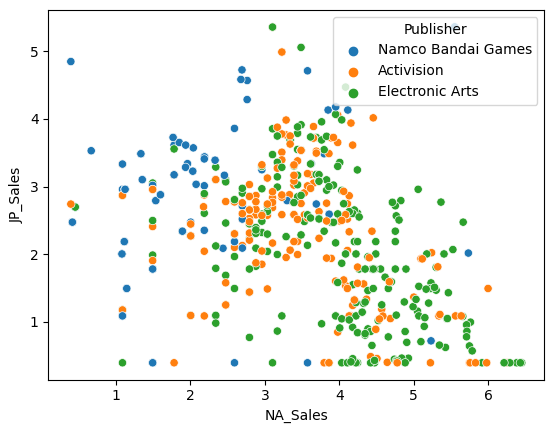

In [7]:
sns.scatterplot(
    x = "NA_Sales",
    y = "JP_Sales",
    hue = "Publisher", # To add a column as color
    data = top3_data
)
plt.show()

In [8]:
'''
CCN -> Categorical, Categorical, Numerical

    - Categorical + Categorical -> Stacked / Dodged Bar Plot
    - Numerical + Categorical -> Boxplot
    
'''

'\nCCN -> Categorical, Categorical, Numerical\n\n    - Categorical + Categorical -> Stacked / Dodged Bar Plot\n    - Numerical + Categorical -> Boxplot\n    \n'

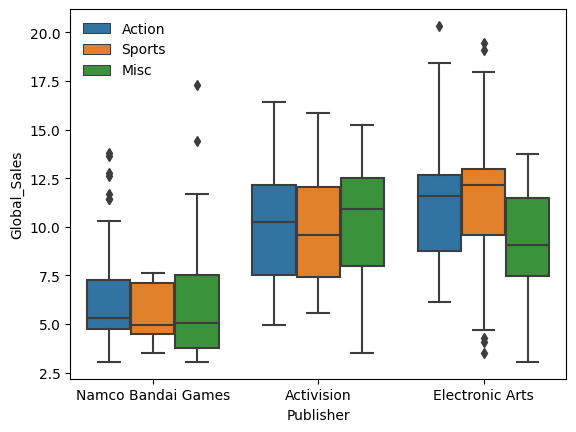

In [42]:
sns.boxplot(
    x = "Publisher",
    y = "Global_Sales",
    hue = "Genre",
    data = top3_data
)

plt.legend(frameon = False)

In [10]:
'''
NNN -> Numerical, Numerical, Numerical

    - Numerical + Numerical -> Scatterplot -> Third numerical variable for size!
'''

'\nNNN -> Numerical, Numerical, Numerical\n\n    - Numerical + Numerical -> Scatterplot -> Third numerical variable for size!\n'

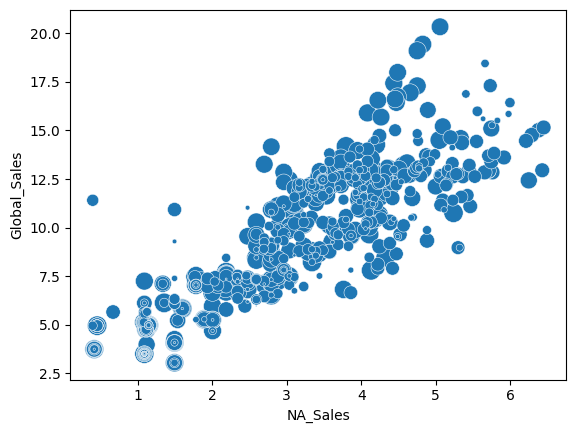

In [12]:
sns.scatterplot(
    x = "NA_Sales",
    y = "Global_Sales",
    size = "Rank",
    sizes = (1, 200),
    data = top3_data
)

plt.legend("", frameon = False)

plt.show()

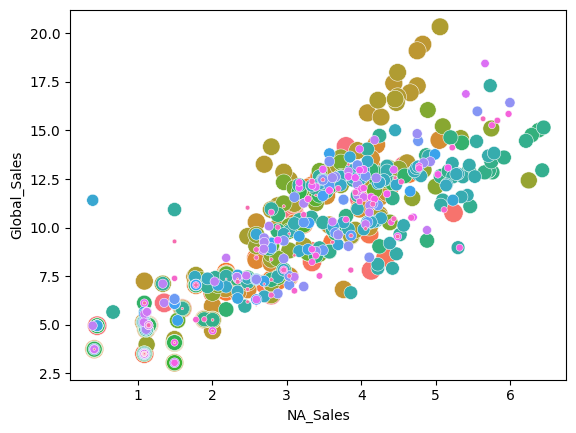

In [15]:
sns.scatterplot(
    x = "NA_Sales",
    y = "Global_Sales",
    size = "Rank",
    sizes = (1, 200),
    hue = "Rank", # NOT THE BEST IDEA! 
    data = top3_data
)

plt.legend("", frameon = False)

plt.show()

# JOINTPLOTS

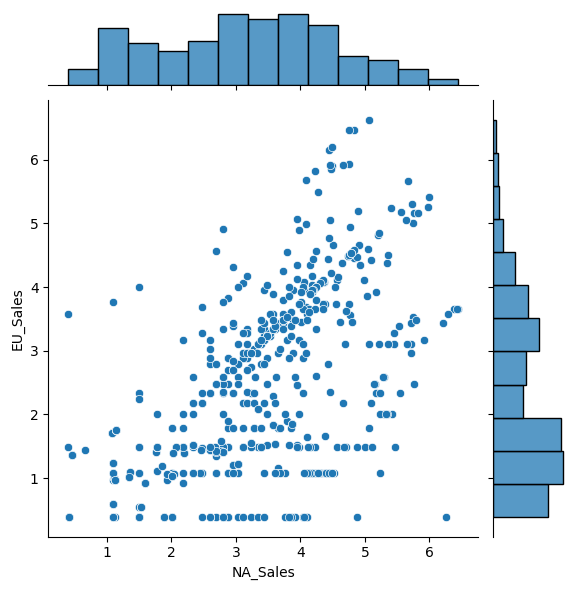

In [16]:
sns.jointplot(
    x = "NA_Sales",
    y = "EU_Sales",
    data = top3_data
)

plt.show()

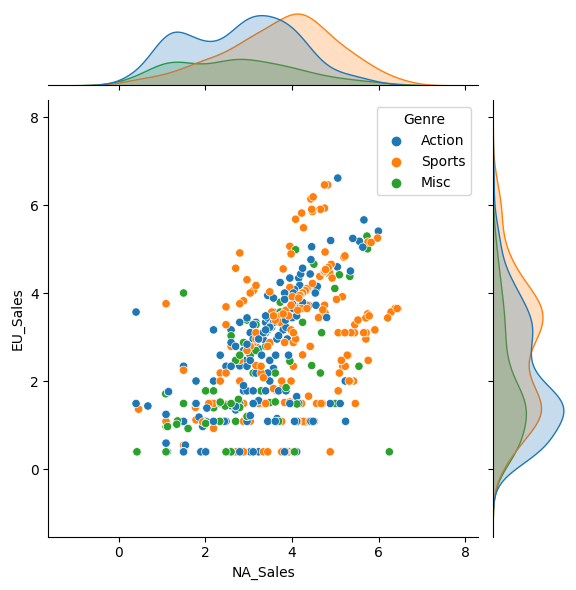

In [41]:
sns.jointplot(
    x = "NA_Sales",
    y = "EU_Sales",
    data = top3_data,
    hue = "Genre"
)

plt.show()

In [18]:
# Scatterplot for every pair of numerical values
# with Genre as hue

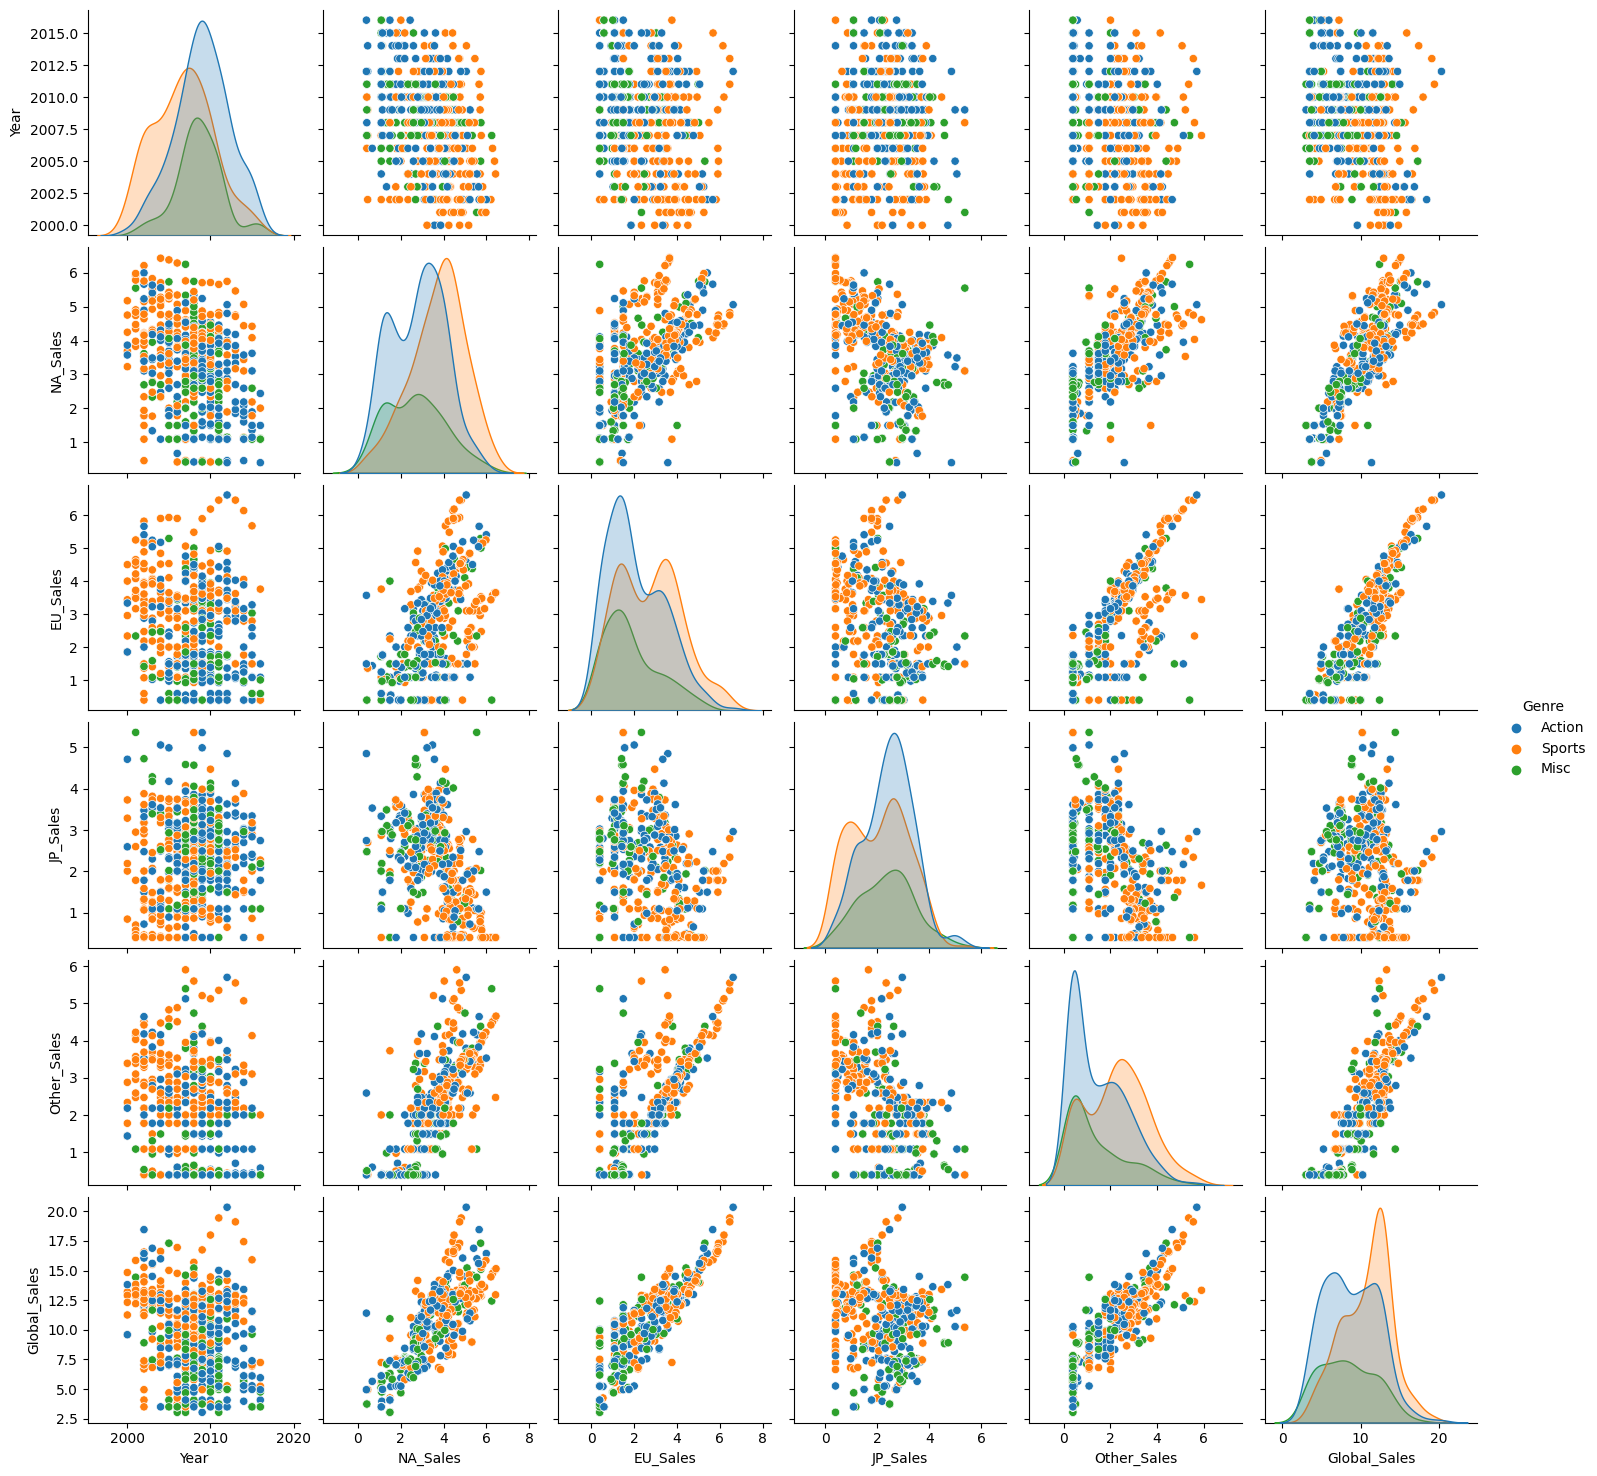

In [20]:
sns.pairplot(data = top3_data, hue = "Genre")

In [22]:
'''
Correlation between two numerical columns ->
-1 to 1 ->
    - -1 Max Negative Correlation
    - 0 No Correlation
    - +1 Max Positive Correlation
'''

'\nCorrelation between two numerical columns ->\n-1 to 1 ->\n    - -1 Max Negative Correlation\n    - 0 No Correlation\n    - +1 Max Positive Correlation\n'

In [24]:
numerical_columns = top3_data[["Rank", "Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]]

In [25]:
numerical_columns

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
2,14279,2012.0,1.145709,1.762339,1.493442,0.408693,4.982552
13,2742,2012.0,3.978349,3.727034,0.848807,2.792725,11.447989
16,1604,2009.0,4.569217,4.108402,1.187272,3.339269,13.181205
19,1741,2008.0,4.156030,4.346074,1.087977,3.390562,12.980643
21,4501,2008.0,3.228043,2.738800,2.585598,3.652926,11.780257
...,...,...,...,...,...,...,...
16438,14938,2008.0,1.087977,0.592445,1.087977,0.394830,3.509168
16479,10979,2013.0,2.186589,1.087977,3.409089,0.394830,7.359902
16601,11802,2011.0,2.340740,1.525543,3.103825,0.394830,7.372592
16636,9196,2011.0,2.697415,1.087977,2.760718,0.394830,6.915540


In [26]:
numerical_columns.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.328705,-0.873726,-0.735711,0.115459,-0.857567,-0.911721
Year,0.328705,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.873726,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.735711,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.115459,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.857567,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.911721,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


<AxesSubplot:xlabel='Other_Sales', ylabel='JP_Sales'>

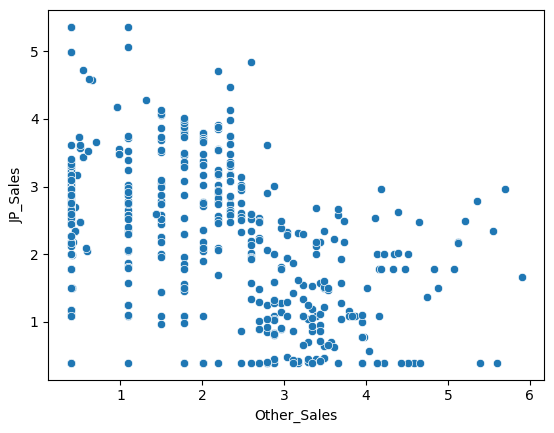

In [28]:
sns.scatterplot(x = "Other_Sales", y = "JP_Sales", data = top3_data)

<AxesSubplot:>

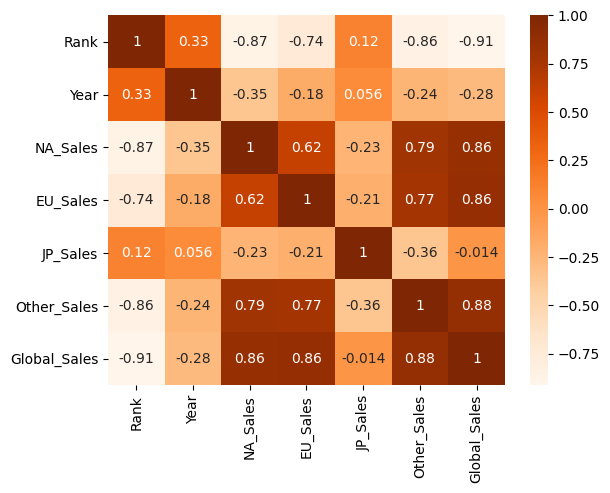

In [37]:
sns.heatmap(
    numerical_columns.corr(),
    cmap = "Oranges",
    annot = True
)

In [33]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co